# Ιnternet οf Τhings

Το σύστημα ArduFarmBot είναι ένα αυτόματο σύστημα για κηπουρική, το οποίο ελέγχει αυτόματα μια αντλία νερού και μια λάμπα θερμότητα. Το σύστημα καταγράφει δεδομένα όπως Θερμοκρασία, Υγρασία, Φωτεινότητα, Υγρασία Εδάφους και τιμές διακοπτών. 
Το σύστημα έχει 2 διακόπτες, μια αντλία και μια λάμπα. Θα δούμε πως μπορούμε να επεξεργαστούμε αυτά τα δεδομένα.
![alt text](https://camo.githubusercontent.com/c489a6ba94683ea09b97f1dc477c3051f8f2fd41/68747470733a2f2f63646e2e696e73747275637461626c65732e636f6d2f464b482f5052544b2f49534342344349412f464b485052544b49534342344349412e4c415247452e6a70673f7261773d74727565)

**Τα δεδομένα αυτά χρησιμοποιούνται για να προβλέψουν πότε πρέπει να ενεργοποιηθεί η αντλία νερού και η λάμπα ώστε να διατηρηθεί μια μικρή φυτεία ζεστή και υγρή.**

Με τεχνικές μηχανικής μάθησης θα δούμε πως μπορούμε να αξιοποιήσουμε τα δεδομένα που συλλέχθηκαν από τους αισθητήρες.

In [0]:
#Importing libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
#colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# azure data = pd.read_csv('ArduFarmBot_Data_Sept_Dec_2016.csv')
# azure data.shape # Raw data: 47,164 measurements with 10 columns

Saving ArduFarmBot_Data_Sept_Dec_2016.csv to ArduFarmBot_Data_Sept_Dec_2016 (1).csv
User uploaded file "ArduFarmBot_Data_Sept_Dec_2016.csv" with length 2105716 bytes


In [29]:
!ls

'ArduFarmBot_Data_Sept_Dec_2016 (1).csv'   sample_data
 ArduFarmBot_Data_Sept_Dec_2016.csv


In [30]:
data = pd.read_csv('./ArduFarmBot_Data_Sept_Dec_2016.csv')
data.shape # Raw data: 47,164 measurements with 10 columns


(47164, 10)

# Προεπεξεργασία δεδομένων

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47164 entries, 0 to 47163
Data columns (total 10 columns):
created_at                  47164 non-null object
entry_id                    47164 non-null int64
Temperature                 18529 non-null float64
Humidity                    18529 non-null float64
Luminosity                  18529 non-null float64
Soil Moisture               18529 non-null float64
Pump Echo                   47134 non-null float64
Lamp Echo                   47134 non-null float64
Capacitive Soil Mositure    13776 non-null float64
Spare                       13584 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 3.6+ MB


Εκτύπωση των 5 πρώτων γραμμών:

In [32]:
data.head()

created_at  entry_id  Temperature  Humidity  Luminosity  \
0  2016-09-19 17:30:23 UTC         1         21.0      43.0        85.0   
1  2016-09-19 17:30:51 UTC         2         21.0      42.0        86.0   
2  2016-09-19 17:31:42 UTC         3         21.0      42.0        86.0   
3  2016-09-19 17:32:09 UTC         4         21.0      43.0        86.0   
4  2016-09-19 17:33:02 UTC         5         21.0      43.0        86.0   

   Soil Moisture  Pump Echo  Lamp Echo  Capacitive Soil Mositure  Spare  
0            0.0        0.0        0.0                       NaN    NaN  
1            0.0        1.0        0.0                       NaN    NaN  
2            0.0        1.0        0.0                       NaN    NaN  
3            0.0        0.0        0.0                       NaN    NaN  
4            0.0        0.0        0.0                       NaN    NaN


Εκτύπωση των 5 τελευταίων γραμμών:

In [33]:
data.tail()

created_at  entry_id  Temperature  Humidity  Luminosity  \
47159  2016-12-14 14:26:34 UTC     47160         27.0      17.0        91.0   
47160  2016-12-14 14:27:18 UTC     47161          NaN       NaN         NaN   
47161  2016-12-14 14:31:26 UTC     47162          NaN       NaN         NaN   
47162  2016-12-14 14:35:34 UTC     47163          NaN       NaN         NaN   
47163  2016-12-14 14:36:41 UTC     47164         28.0      17.0        91.0   

       Soil Moisture  Pump Echo  Lamp Echo  Capacitive Soil Mositure  Spare  
47159           88.0        0.0        0.0                      97.0    0.0  
47160            NaN        0.0        0.0                       NaN    NaN  
47161            NaN        0.0        0.0                       NaN    NaN  
47162            NaN        0.0        0.0                       NaN    NaN  
47163           89.0        0.0        0.0                      98.0    0.0

Περιγραφή των τιμών της στήλης "Θερμοκρασίας"

In [34]:
data['Temperature'].describe()

count    18529.000000
mean        18.754223
std          5.869399
min          0.000000
25%         14.000000
50%         17.000000
75%         23.000000
max         58.000000
Name: Temperature, dtype: float64

**Πίνακας Συσχέτισης**

In [35]:
data.corr()

entry_id  Temperature  Humidity  Luminosity  \
entry_id                  1.000000     0.020369 -0.346100    0.025523   
Temperature               0.020369     1.000000 -0.703684    0.628502   
Humidity                 -0.346100    -0.703684  1.000000   -0.413793   
Luminosity                0.025523     0.628502 -0.413793    1.000000   
Soil Moisture             0.346649    -0.057865 -0.065922   -0.047375   
Pump Echo                -0.093943     0.066085 -0.042927    0.090104   
Lamp Echo                -0.074037    -0.299652  0.227611   -0.141660   
Capacitive Soil Mositure  0.750806     0.253139 -0.251573    0.101534   
Spare                    -0.026323          NaN       NaN         NaN   

                          Soil Moisture  Pump Echo  Lamp Echo  \
entry_id                       0.346649  -0.093943  -0.074037   
Temperature                   -0.057865   0.066085  -0.299652   
Humidity                      -0.065922  -0.042927   0.227611   
Luminosity                    -0.047375   0.090104  -0.141660   
Soil Moisture                  1.000000  -0.398164   0.045351   
Pump Echo                     -0.398164   1.000000   0.006109   
Lamp Echo                      0.045351   0.006109   1.000000   
Capacitive Soil Mositure       0.092071   0.028926  -0.188517   
Spare                               NaN   0.127469   0.042164   

                          Capacitive Soil Mositure     Spare  
entry_id                                  0.750806 -0.026323  
Temperature                               0.253139       NaN  
Humidity                                 -0.251573       NaN  
Luminosity                                0.101534       NaN  
Soil Moisture                             0.092071       NaN  
Pump Echo                                 0.028926  0.127469  
Lamp Echo                                -0.188517  0.042164  
Capacitive Soil Mositure                  1.000000 -0.056027  
Spare                                    -0.056027  1.000000

Τι μας δείχνει ο πίνακας συσχέτισης:


Αν η τιμή=1 τέλεια θετική γραμμική συσχέτιση και όλα τα σημεία βρίσκονται πάνω σε μια ευθεία με θετική κλίση (y = αx + β, α> 0)

Αν  0 < τιμή < +1,	τότε οι Χ, Υ είναι θετικά γραμμικά συσχετισμένες

Αν η τιμή = -1,	τότε έχουμε τέλεια αρνητική γραμμική συσχέτιση και όλα τα σημεία βρίσκονται πάνω σε μια ευθεία με αρνητική κλίση (y = αx+ β, α<0)

Αν  -1 < τιμή <0,	τότε οι Χ, Υ είναι αρνητικά γραμμικά συσχετισμένες 

Αν η τιμή = 0,	τότε δεν υπάρχει γραμμική συσχέτιση μεταξύ των μεταβλητών. Οι μεταβλητές δηλαδή Χ, Υ είναι γραμμικά ασυσχέτιστες. 

## Καθαρισμός δεδομένων
Δημιουργούμε ένα νέο dataframe (αντιγράφοντας το παλιό) και διαγράφουμε τις στήλες που περιέχουν *περιττές πληροφορίες*  (το created at και το entry_id) ή *μη ενδιαφέρουσες πληροφορίες* ('Capacitive Soil Mositure' και το 'Spare')

In [0]:
df = data

In [0]:
del df['created_at']
del df['entry_id']
del df['Capacitive Soil Mositure']
del df['Spare']


In [38]:
df.tail()

Temperature  Humidity  Luminosity  Soil Moisture  Pump Echo  Lamp Echo
47159         27.0      17.0        91.0           88.0        0.0        0.0
47160          NaN       NaN         NaN            NaN        0.0        0.0
47161          NaN       NaN         NaN            NaN        0.0        0.0
47162          NaN       NaN         NaN            NaN        0.0        0.0
47163         28.0      17.0        91.0           89.0        0.0        0.0

Διαγράφουμε όσες γραμμές περιέχουν* 3 ή περισσότερα κενά κελιά*.

In [0]:
rows_before = df.shape[0]
df_clean = df.dropna(thresh=3) # drop rows with more than 3 NaN's
rows_after = df_clean.shape[0]

In [40]:
rows_before - rows_after

28635

In [41]:
df_clean.tail()

Temperature  Humidity  Luminosity  Soil Moisture  Pump Echo  Lamp Echo
47149         26.0      19.0        90.0           88.0        0.0        0.0
47152         27.0      17.0        90.0           89.0        0.0        0.0
47156         27.0      17.0        90.0           88.0        0.0        0.0
47159         27.0      17.0        91.0           88.0        0.0        0.0
47163         28.0      17.0        91.0           89.0        0.0        0.0

Γνωρίζουμε ότι η ένδειξη Soil Moisture = 0,0, σημαίνει ότι ο αισθητήρας υγρασίας εδάφους δεν ήταν συνδεδεμένος. Οπότε θα δημιουργήσουμε ένα φίλτρο το οποίο θα κρατάει μόνο τις γραμμές όπου η τιμή για το Soil Moisture είναι μεγαλύτερη του 0. 

In [42]:
df_clean['Soil Moisture'].describe()

count    18529.000000
mean        78.210751
std         16.958982
min          0.000000
25%         76.000000
50%         82.000000
75%         86.000000
max        102.000000
Name: Soil Moisture, dtype: float64

In [43]:
filter = df_clean['Soil Moisture']>0.0

df_clean = df_clean[filter]

df_clean.shape # Clean data: 18,023 samples with 6 columns

(18023, 6)

In [44]:
df_clean['Soil Moisture'].describe()

count    18023.000000
mean        80.406536
std         10.914068
min          1.000000
25%         77.000000
50%         83.000000
75%         86.000000
max        102.000000
Name: Soil Moisture, dtype: float64

Εκτυπώνουμε τα διαγράμματα για τις διάφορες μετρήσεις, με σκοπό την εκτίμηση της διακύμανσης των τιμών των μεταβλητών.

##Κατανόηση δεδομένων

Θα χρησιμοποιήσουμε το σύνολο των δεδομένων, μετά τον καθαρισμό, είναι 18023. Θα απεικονίσουμε σε γραφική τις τιμές κάθε αισθητήρα και θα προσπαθήσουμε να την κατανοήσουμε.  

### Θερμοκρασία

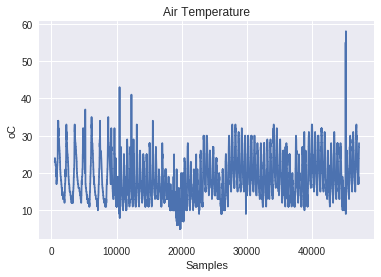

In [45]:
plt.xlabel('Samples')
plt.ylabel('oC')
plt.title('Air Temperature')
plt.plot(df_clean['Temperature'])

Από τη γραφική για την θερμοκρασία παρατηρούμε ότι υπάρχει μια μεγάλη διακύμανση μεταξύ των τιμών 5<sup>ο</sup>C - 43<sup>ο</sup>C. Οτιδήποτε πέρα από το άνω όριο θα πρέπει να το αγνοήσουμε, δηλαδή να το διαγράψουμε.

### Ατμοσφαιρική υγρασία

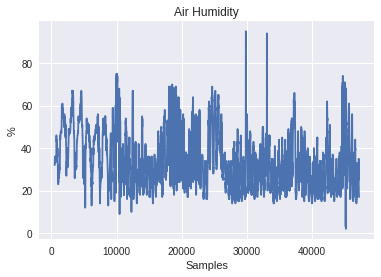

In [46]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Air Humidity')
plt.plot(df_clean['Humidity'])

Παρατηρούμε στη γραφική ότι οι τιμές για την υγρασία της ατμόσφαιρας κυμαίνονται μεταξύ 10% και 80%.

### Φωτεινότητα

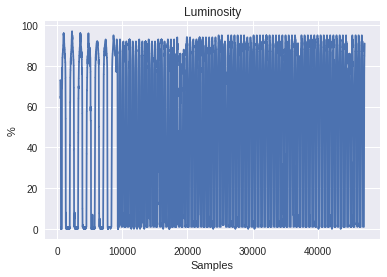

In [47]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Luminosity')
plt.plot(df_clean['Luminosity'])

Για την φωτεινότητα, παρατηρούμε, ότι λαμβάνει τιμές από όλο το εύρος,  λόγω της διακύμανσής της  κατά τη διάρκεια του 24ώρου.

### Υγρασία του εδάφους

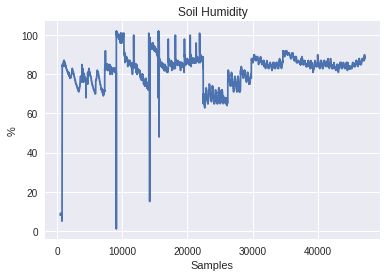

In [48]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Soil Humidity')
plt.plot(df_clean['Soil Moisture'])

Η τιμές για την υγρασία του εδάφους κυμαίνονται από 60% και άνω. Οι τιμές κάτω από το 60% θα αγνοηθούν.

### Αντλία νερού

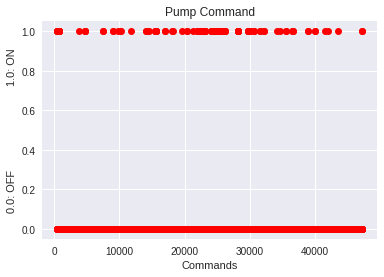

In [49]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Pump Command')
plt.plot(df_clean['Pump Echo'], 'ro')

Η γραφική αυτή αντιστοιχεί στην τιμή που είχε η αντλία (on ή off) όταν αποθηκεύτηκε η εγγραφή. 


### Λάμπα

Όμοια , και η επόμενη γραφική μας δείχνει τις τιμές της λάμπας (on ή off) που είχε τη στιγμή που αποθηκεύτηκε η εγγραφή. 

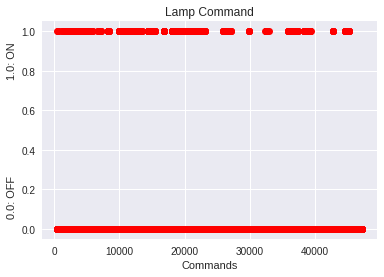

In [50]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                                1.0: ON')
plt.title('Lamp Command')
plt.plot(df_clean['Lamp Echo'], 'ro')

## Μέθοδος Μηχανικής Μάθησης

Για την ανάλυση του dataset, θα χρησιμοποιήσουμε τον ταξινομητή decision tree.

Θεωρούμε ως σύνολο εκπαίδευσης τα δεδομένα από τους αισθητήρες (Θερμοκρασία, Υγρασία, Φωτεινότητα, Υγρασία Εδάφους).

Τις τιμές του dataset για την αντλία και τη λάμπα θα τις χρησιμοποιήσουμε, ως labels (μεταβλητή y) με σκοπό να εκτελέσουμε δύο φορές τον αλγορίθμο επιβλεπόμενης μάθησης και να παράγουμε αντίστοιχα μοντέλα πρόβλεψης για την αντλία και τη λάμπα. 

(Και στις 2 περιπτώσεις ως σύνολο εκπαίδευσης θεωρούμε τα δεδομένα από τους αισθητήρες (Θερμοκρασία, Υγρασία, Φωτεινότητα, Υγρασία Εδάφους)).






Θα χωρίσουμε το dataset σε training & test set. 

Παρακάτω βλέπουμε ένα παράδειγμα διαχωρισμού του dataset με αναλογία 60-40:

![data split](https://cdn.pbrd.co/images/HIHk6Ie.png)

Χρησιμοποιούμε το train set για να εκτιμούμε και να βελτιώνουμε το μοντέλο της μηχανικής μάθησης κατά την ανάπτυξή του. Δεν επιτρέπεται σε κανένα σημείο η χρήση των δεδομένων test για την εκπαίδευση του μοντέλου.

![training](https://cdn.pbrd.co/images/HIHldDM.png)

Χρησιμοποιούμε μετά το test set για να αξιολογήσουμε στατιστικά την απόδοση του μοντέλου μας.

![testing](https://cdn.pbrd.co/images/HIHlCJ5L.png)

### Μοντέλο για την αντλία νερού

Αρχικά, θα εκπαιδεύσουμε το πρώτο μοντέλο μας, χρησιμοποιώντας ως labels τις τιμές για την αντλία νερού. 

In [51]:
#labels of pump
y = df_clean[['Pump Echo']].copy()
y.head()

Pump Echo
504        0.0
505        0.0
506        0.0
507        0.0
508        0.0

In [52]:
# Features in X
X = df_clean[['Temperature','Humidity','Luminosity','Soil Moisture']].copy()
X.head()

Temperature  Humidity  Luminosity  Soil Moisture
504         23.0      32.0        73.0            8.0
505         23.0      32.0        73.0            8.0
506         23.0      32.0        73.0            8.0
507         23.0      32.0        73.0            8.0
508         23.0      32.0        73.0            8.0

Χωρίζουμε το dataset σε train (66%) και test set (33%).

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=0)

Έπειτα, θα χρησιμοποιήσουμε τo X_train και το y_train (labels - τιμές αντλίας) για να εκπαιδεύσουμε τον ταξινομητή μας.




In [54]:
pump_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
pump_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Για την πρόβλεψη, θα χρησιμοποιήσουμε το Χ_test σύνολο δεδομένων:

In [55]:
predictions = pump_classifier.predict(X_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

Για να εκτιμήσουμε την απόδοση του μοντέλου μας θα χρησιμοποιήσουμε τα y_test (τιμές αντλίας).

In [56]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9936112979152656

Η ακρίβεια του αλγορίθμου είναι  99%, σχεδόν τέλεια.



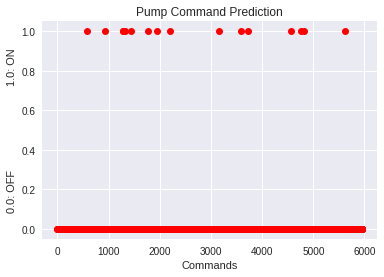

In [57]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Pump Command Prediction')
plt.plot(predictions, 'ro')

Για τις προβλέψεις που υπολογίσε το μοντέλο μας, μπορούμε να παρατηρήσουμε τις διακυμάνσεις της θερμοκρασία σε συνάρτηση με την υγρασία του εδάφους.

In [59]:
df_test = X_test
df_test['pump_predictions']=predictions
df_test = df_test[df_test.pump_predictions !=0]
df_test

Temperature  Humidity  Luminosity  Soil Moisture  pump_predictions
22497         14.0      45.0         1.0           65.0               1.0
25504         14.0      56.0         2.0           65.0               1.0
26081          9.0      52.0        25.0           65.0               1.0
22626         11.0      30.0         1.0           63.0               1.0
22551         12.0      39.0         1.0           65.0               1.0
22564         13.0      30.0         1.0           65.0               1.0
22578         14.0      27.0         1.0           65.0               1.0
26064         13.0      30.0         1.0           65.0               1.0
22591         14.0      24.0         1.0           65.0               1.0
9119          19.0      43.0        88.0          102.0               1.0
22660         15.0      23.0         1.0           63.0               1.0
25033         15.0      62.0         1.0           65.0               1.0
22705         10.0      50.0        76.0           65.0               1.0
9096          17.0      47.0        86.0          102.0               1.0
9098          17.0      47.0        86.0          102.0               1.0
26125         11.0      41.0        84.0           65.0               1.0

In [60]:
df_test.describe()

Temperature   Humidity  Luminosity  Soil Moisture  pump_predictions
count    16.000000  16.000000   16.000000      16.000000              16.0
mean     13.625000  40.375000   28.500000      71.687500               1.0
std       2.680174  11.915676   39.166312      15.054208               0.0
min       9.000000  23.000000    1.000000      63.000000               1.0
25%      11.750000  30.000000    1.000000      65.000000               1.0
50%      14.000000  42.000000    1.000000      65.000000               1.0
75%      15.000000  47.750000   78.000000      65.000000               1.0
max      19.000000  62.000000   88.000000     102.000000               1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74dc5900b8>]],
      dtype=object)

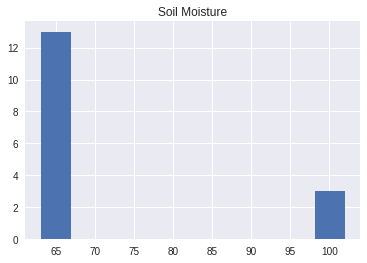

In [61]:
df_test.hist(column='Soil Moisture', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74dc5a3400>]],
      dtype=object)

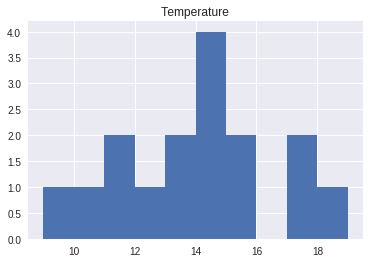

In [62]:
df_test.hist(column='Temperature', bins=10)

### Συμπεράσματα για την αντλία

Από τα ιστογράμματα  και τον πίνακα περιγραφής μπορoύμε να αντιληφθούμε ότι η αντλία ενεργοποιείται αυτόματα κάθε φορά που η υγρασία του εδάφους φτάvει στα χαμηλότερα επίπεδα (γύρω στο 65%) και η θερμοκρασία είναι χαμηλή (10 έως 15<sup> o</sup>C).

Ορισμένες ενεργοποιήσεις εμφανίζονται γύρω στο 100% που δεν θα είχαν νόημα αν δεν υπήρχε η δυνατότητα χειροκίνητης ενεργοποίησης.


Άρα συμπεραίνουμε ότι η αντλία πρέπει να ενεργοποιείται κάθε φορά που η υγρασία του εδάφους πέφτει κάτω από 65% και η θερμοκρασία του αέρα είναι χαμηλή, για παράδειγμα το πρωί.


### Μοντέλο για τη  λάμπα

Στη συνέχεια, θα εκπαιδεύσουμε το δεύτερο μοντέλο μας, χρησιμοποιώντας ως labels τις τιμές της λάμπας.  

In [63]:
# Target variable
y = df_clean[['Lamp Echo']].copy()
y.head()

Lamp Echo
504        0.0
505        0.0
506        0.0
507        0.0
508        0.0

Χωρίζουμε το dataset σε train (66%) και test set (33%). 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Έπειτα, θα χρησιμοποιήσουμε τo X_train και το y_train (labels - τιμές αντλίας) για να εκπαιδεύσουμε τον ταξινομητή μας.

In [65]:
lamp_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
lamp_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Για την πρόβλεψη, θα χρησιμοποιήσουμε το Χ_test σύνολο δεδομένων:

In [0]:
predictions = pump_classifier.predict(X_test)

Για να εκτιμήσουμε την απόδοση του μοντέλου μας θα χρησιμοποιήσουμε τα y_test (τιμές λάμπας).

In [67]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9309011432414257

Η εφαρμογή του μοντέλου στα test data , παρουσιάσε ακρίβεια 93%.
Λαμβάνοντας υπόψη μόνο τα δείγματα όπου η μεταβλητή Lamp Echo ήταν ΟΝ (τιμή 1) παρατηρήσαμε ότι η λάμπα ενεργοποιείται αυτόματα σε χαμηλές θερμοκρασίες (περίπου 12<sup>o</sup>C). Ορισμένες ενεργοποιήσεις που εμφανίζονται επίσης γύρω στους 25<sup>o</sup>C,  μπορούν να αποδοθούν στις χειροκίνητες εντολές.

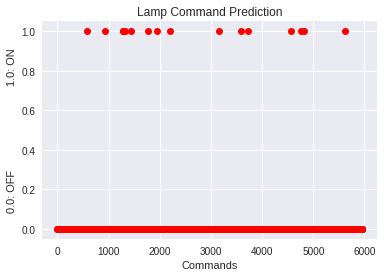

In [68]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Lamp Command Prediction')
plt.plot(predictions, 'ro')

In [69]:
df_test = X_test
df_test['Lamp predictions']=predictions
df_test = df_test[df_test['Lamp predictions'] !=0]
df_test

Temperature  Humidity  Luminosity  Soil Moisture  Lamp predictions
22497         14.0      45.0         1.0           65.0               1.0
25504         14.0      56.0         2.0           65.0               1.0
26081          9.0      52.0        25.0           65.0               1.0
22626         11.0      30.0         1.0           63.0               1.0
22551         12.0      39.0         1.0           65.0               1.0
22564         13.0      30.0         1.0           65.0               1.0
22578         14.0      27.0         1.0           65.0               1.0
26064         13.0      30.0         1.0           65.0               1.0
22591         14.0      24.0         1.0           65.0               1.0
9119          19.0      43.0        88.0          102.0               1.0
22660         15.0      23.0         1.0           63.0               1.0
25033         15.0      62.0         1.0           65.0               1.0
22705         10.0      50.0        76.0           65.0               1.0
9096          17.0      47.0        86.0          102.0               1.0
9098          17.0      47.0        86.0          102.0               1.0
26125         11.0      41.0        84.0           65.0               1.0

In [70]:
df_test.describe()

Temperature   Humidity  Luminosity  Soil Moisture  Lamp predictions
count    16.000000  16.000000   16.000000      16.000000              16.0
mean     13.625000  40.375000   28.500000      71.687500               1.0
std       2.680174  11.915676   39.166312      15.054208               0.0
min       9.000000  23.000000    1.000000      63.000000               1.0
25%      11.750000  30.000000    1.000000      65.000000               1.0
50%      14.000000  42.000000    1.000000      65.000000               1.0
75%      15.000000  47.750000   78.000000      65.000000               1.0
max      19.000000  62.000000   88.000000     102.000000               1.0

### Συμπεράσματα για τη λάμπα

Η λυχνία ενεργοποιήθηκε κάθε φορά που η θερμοκρασία του αέρα ήταν χαμηλή (περίπου 12<sup>o</sup>C). Αυτό είναι το κλειδί για να βοηθήσει, κυρίως στα πρώιμα στάδια της φάσης βλάστησης των σπόρων.
 
 
 
 
 **Παρατήρηση **

Τα δεδομένα σχετικά με την υγρασία του αέρα και τη φωτεινότητα δεν χρησιμοποιήθηκαν για τον έλεγχο των ενεργοποιητών.